## Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

grid_search_results = r"D:\Users\91584\PycharmProjects\uitb-headsup-computing\huc\envs\mobile_reading\results\0815 from peisen's computer\selection_results.csv"

df_grid_search = pd.read_csv(grid_search_results)

params = {
    'init_delta_t':None,
    'init_sigma_position_memory':None,
    'weight_memory_decay':None,
    'spatial_dist_coeff':None,
}

layouts = ['L0', 'L50', 'L100']
metrics = ['steps', 'error']

human_data_steps_list = [1.572, 1.246, 1.032]    # L0, L50, L100
human_data_error_list = [9.311, 4.275, 2.016]    # L0, L50, L100

In [2]:
# # Normalize a list
# def normalize(lst):
#     min_val = min(lst)
#     max_val = max(lst)
#     if min_val == max_val:  # Avoid division by zero
#         return [0.5 for _ in lst]  # Return 0.5 (middle) if all values are same
#     return [(x - min_val) / (max_val - min_val) for x in lst]

# # Compute the sum of squared differences
# def compute_ssd(simulated, human):
#     return sum([(s - h)**2 for s, h in zip(simulated, human)])

# best_params = None
# best_ssd = float('inf')  # initialized to a very large value

# # Iterate over each unique parameter combination
# for param_comb in df_grid_search.drop(['layout', 'steps', 'error'], axis=1).drop_duplicates().iterrows():
#     param_comb = param_comb[1]
#     ssd_steps = 0
#     ssd_error = 0

#     for layout in layouts:
#         filtered_df = df_grid_search[
#             (df_grid_search['init_delta_t'] == param_comb['init_delta_t']) &
#             (df_grid_search['init_sigma_position_memory'] == param_comb['init_sigma_position_memory']) &
#             (df_grid_search['weight_memory_decay'] == param_comb['weight_memory_decay']) &
#             (df_grid_search['spatial_dist_coeff'] == param_comb['spatial_dist_coeff']) &
#             (df_grid_search['layout'] == layout)
#         ]

#         sim_steps = filtered_df['steps'].values[0]
#         sim_error = filtered_df['error'].values[0]

#         ssd_steps += compute_ssd(normalize([sim_steps]), normalize([human_data_steps_list[layouts.index(layout)]]))
#         ssd_error += compute_ssd(normalize([sim_error]), normalize([human_data_error_list[layouts.index(layout)]]))

#     # Sum up the SSDs for steps and error
#     combined_ssd = ssd_steps + ssd_error

#     if combined_ssd < best_ssd:
#         best_ssd = combined_ssd
#         best_params = param_comb

# print("Best parameter set:", best_params)


In [3]:
# Normalize a list
def normalize(lst):
    min_val = min(lst)
    max_val = max(lst)
    if min_val == max_val:  # Avoid division by zero
        return [0.5 for _ in lst]  # Return 0.5 (middle) if all values are same
    return [(x - min_val) / (max_val - min_val) for x in lst]

# Define the cost function
def compute_cost(sim_data, human_data):
    return sum(abs(sim - human) for sim, human in zip(sim_data, human_data))

# Normalize the human data
human_steps_norm = normalize(human_data_steps_list)
human_error_norm = normalize(human_data_error_list)

# Iterate through each unique parameter combination
unique_params = df_grid_search.drop(columns=['layout', 'steps', 'error']).drop_duplicates()

min_cost = float('inf')
best_params = None

for index, row in unique_params.iterrows():
    # Filter the dataframe for the specific parameter combination
    filtered_df = df_grid_search[
        (df_grid_search['init_delta_t'] == row['init_delta_t']) &
        (df_grid_search['init_sigma_position_memory'] == row['init_sigma_position_memory']) &
        (df_grid_search['weight_memory_decay'] == row['weight_memory_decay']) &
        (df_grid_search['spatial_dist_coeff'] == row['spatial_dist_coeff'])
    ]
    
    sim_steps = [filtered_df[filtered_df['layout'] == layout]['steps'].values[0] for layout in layouts]
    sim_error = [filtered_df[filtered_df['layout'] == layout]['error'].values[0] for layout in layouts]
    
    # Normalize the simulated data
    sim_steps_norm = normalize(sim_steps)
    sim_error_norm = normalize(sim_error)
    
    # Compute the cost
    cost_steps = compute_cost(sim_steps_norm, human_steps_norm)
    cost_error = compute_cost(sim_error_norm, human_error_norm)
    total_cost = cost_steps + cost_error

    # Update the best parameters if this cost is lower
    if total_cost < min_cost:
        min_cost = total_cost
        best_params = row

print("Best parameters:", best_params)



Best parameters: init_delta_t                  3.0
init_sigma_position_memory    5.0
weight_memory_decay           0.6
spatial_dist_coeff            3.0
Name: 8679, dtype: float64


In [4]:
print("The min cost is:", min_cost)

The min cost is: 0.012166321249373224


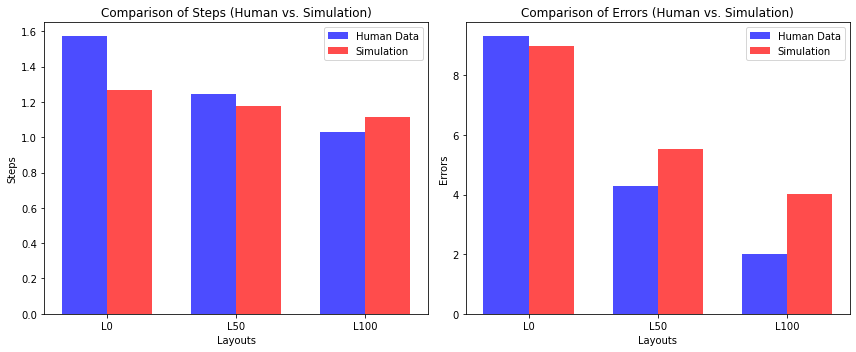

In [6]:
import matplotlib.pyplot as plt

# Using best_params, get the simulation data for steps and errors for the best parameters
filtered_best_params_df = df_grid_search[
    (df_grid_search['init_delta_t'] == best_params['init_delta_t']) &
    (df_grid_search['init_sigma_position_memory'] == best_params['init_sigma_position_memory']) &
    (df_grid_search['weight_memory_decay'] == best_params['weight_memory_decay']) &
    (df_grid_search['spatial_dist_coeff'] == best_params['spatial_dist_coeff'])
]

sim_steps_best = [filtered_best_params_df[filtered_best_params_df['layout'] == layout]['steps'].values[0] for layout in layouts]
sim_error_best = [filtered_best_params_df[filtered_best_params_df['layout'] == layout]['error'].values[0] for layout in layouts]

# Ratios
ratio_steps = 1/7
ratio_error = 4.8

# Adjust simulation results by the given ratios
sim_steps_best = [value * ratio_steps for value in sim_steps_best]
sim_error_best = [value * ratio_error for value in sim_error_best]

# Plotting
bar_width = 0.35
indices = np.arange(len(layouts))

plt.figure(figsize=(12, 5))

# For steps
plt.subplot(1, 2, 1)
bar1 = plt.bar(indices, human_data_steps_list, bar_width, label='Human Data', color='b', alpha=0.7)
bar2 = plt.bar(indices + bar_width, sim_steps_best, bar_width, label='Simulation', color='r', alpha=0.7)

plt.xlabel('Layouts')
plt.ylabel('Steps')
plt.title('Comparison of Steps (Human vs. Simulation)')
plt.xticks(indices + bar_width / 2, layouts)  # Positioning on the x axis
plt.legend()

# For errors
plt.subplot(1, 2, 2)
bar1 = plt.bar(indices, human_data_error_list, bar_width, label='Human Data', color='b', alpha=0.7)
bar2 = plt.bar(indices + bar_width, sim_error_best, bar_width, label='Simulation', color='r', alpha=0.7)

plt.xlabel('Layouts')
plt.ylabel('Errors')
plt.title('Comparison of Errors (Human vs. Simulation)')
plt.xticks(indices + bar_width / 2, layouts)  # Positioning on the x axis
plt.legend()

plt.tight_layout()
plt.show()
